So far we've learnt the most basic but crucial algorithms a data scientist and a machine learning engineer must know. We've learnt the techniques for classification and regression, and we've done some very rudementary data exploration. Hopefully, you've also done the assignments and the mini projects in the courses we recommended you to do. In this assignment, we give you a very easy dataset on which you can perform both classification and regression tasks. The purpose of this assignment is for you to try your hand out at all the techniques you've learnt so far and work on a real dataset to figure out whether what you learnt up until now works.

## Link to the Dataset

https://archive.ics.uci.edu/ml/datasets/wine+quality

For you to submit this assingment, you'll have to give us the accuracy you're getting on your classification, what algorithms/techniques you used for classification and why. Also, you'll give us the minimum loss you got in your regression, what algorithms/techniques you used and why. Just as last assignment, you'll clone the original folder, work completely on this Jupyter notebook and submit all your work. Also, you'll include in a text cell the above things. Happy playing on this dataset!


## Some things that must be present in the notebook
- Read the dataset and display various details of data (correlation,some statistics etc..)
- Split the data into train test split
- Show some vizualizations
- Models for both classification and regression.
- Show the results clearly and all of them must be on the test set

This [book](https://github.com/dvrg/educate-resource-for-machine-learning/blob/master/6.%20Machine%20Learning%20Mastery%20With%20Python%20Understand%20Your%20Data%2C%20Create%20Accurate%20Models%20and%20work%20Projects%20End-to-End.pdf) is a great resource for data science/predictive modelling in general and can be used as reference book for this task and future. The book highlights all the necessary steps one must take to understand data and build powerful models in a simple and understandable manner. 

### Accuracy on your classification task and the reason you used this algorithm/technique ->  .90 I tried all the classification algorithms with different parameters in Kneighbors, LogisticRegression, Naive Baiyes But the best accuracy was with RandomForestClassifier.

### Minimum loss on you regression task and the reason you used this algorithm/technique ->  0.35 The same goes with Regression task as it gave the least RMSE error among trying with Linear Regression, SVR and DecisionTreeClassifier. Linear Regression worked the best.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=";")
data_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=";")


In [19]:
df = pd.concat([data_red,data_white],axis=0)

In [20]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


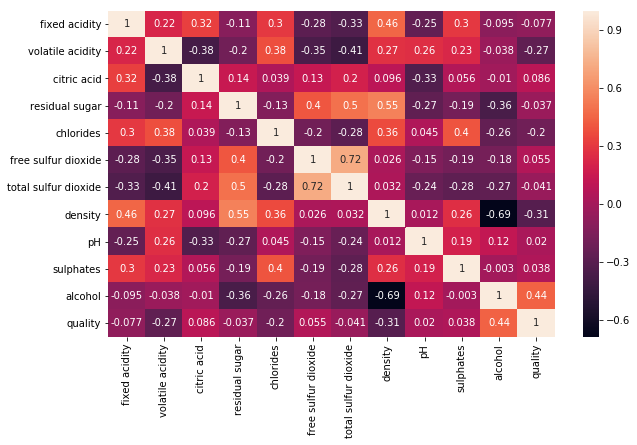

In [21]:
plt.subplots(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr,annot=True)

In [22]:
relevant_col = corr.nlargest(7,'quality')['quality'].index
corrcoef = np.corrcoef(df[relevant_col].values.T)

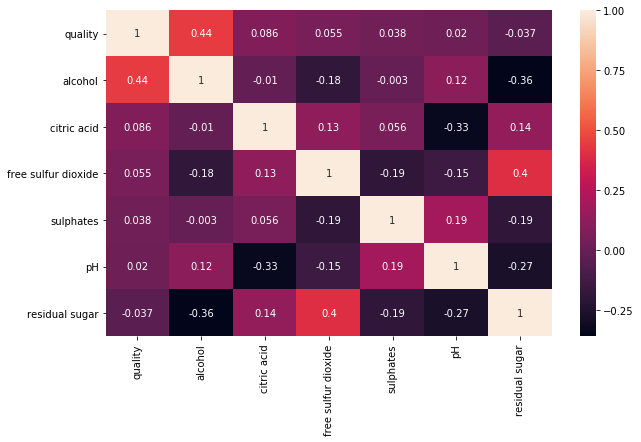

In [23]:
plt.subplots(figsize=(10,6))
corr = df.corr()
sns.heatmap(corrcoef,annot=True,xticklabels=relevant_col.values,yticklabels=relevant_col.values)

In [24]:
X = df.drop('quality',axis=1)
y = df['quality']




In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [29]:
#For Regression
from sklearn.metrics import accuracy_score, confusion_matrix ,mean_squared_error
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
pred_lr = regressor.predict(X_test)


print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_lr)))

Root Mean Squared Error: 0.3568769547676022


In [28]:
#For Classification
y= y>6.5 #Assuming that quality above 6.5 is good andd below it is bad
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
accuracy = accuracy_score(pred_rf,y_test)
print("Accuracy Score: %.2f"%accuracy)

Accuracy Score: 0.89
